<a href="https://colab.research.google.com/github/Brahmavartika-108/Brahmavartika-108/blob/main/QuantumBlockchainIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit-ibm-runtime --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.8/366.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc scipy numpy matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 985.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3fe9302e5fce7357b012fe5e386c42fff03743ab2b0a26b0ebbe16a319012547
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
!pip install qiskit
!pip install pylatexenc
!pip install scipy
!pip install numpy
!pip install matplotlib

In [5]:
import qiskit

In [6]:
# Qiskit patterns step 1: Map your problem to quantum circuit
# Import some generic packages

import numpy as np
from qiskit import QuantumCircuit

# Set up a random number generator and a quantum circuit. We choose to start with 20 bits, though any number <30 should be fine.

rng = np.random.default_rng()
bit_num = 20
qc = QuantumCircuit(bit_num, bit_num)

# QKD step 1: Random bits and bases for Alice
# generate Alice's random bits

abits = np.round(rng.random(bit_num))

# generate Alice's random measurement bases. Here we will associate a "0" with the Z basis, and a "1" with the X basis.

abase = np.round(rng.random(bit_num))

# Alice's state preparation. Check that this creates states according to table 1

for n in range(bit_num):
    if abits[n] == 0:
        if abase[n] == 1:
            qc.h(n)
    if abits[n] == 1:
        if abase[n] == 0:
            qc.x(n)
        if abase[n] == 1:
            qc.x(n)
            qc.h(n)

qc.barrier()

# QKD step 2: Random bases for Bob
# generate Bob's random measurement bases.

bbase = np.round(rng.random(bit_num))

# Note that if Bob measures in Z no gates are necessary, since IBM Quantum computers measure in Z by default.
# If Bob measures in the X basis, we implement a hadamard gate qc.h to facilitate the measurement.

for m in range(bit_num):
    if bbase[m] == 1:
        qc.h(m)
    qc.measure(m, m)

Alice's bits are  [1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
Alice's bases are  [1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
Bob's bases are  [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.]


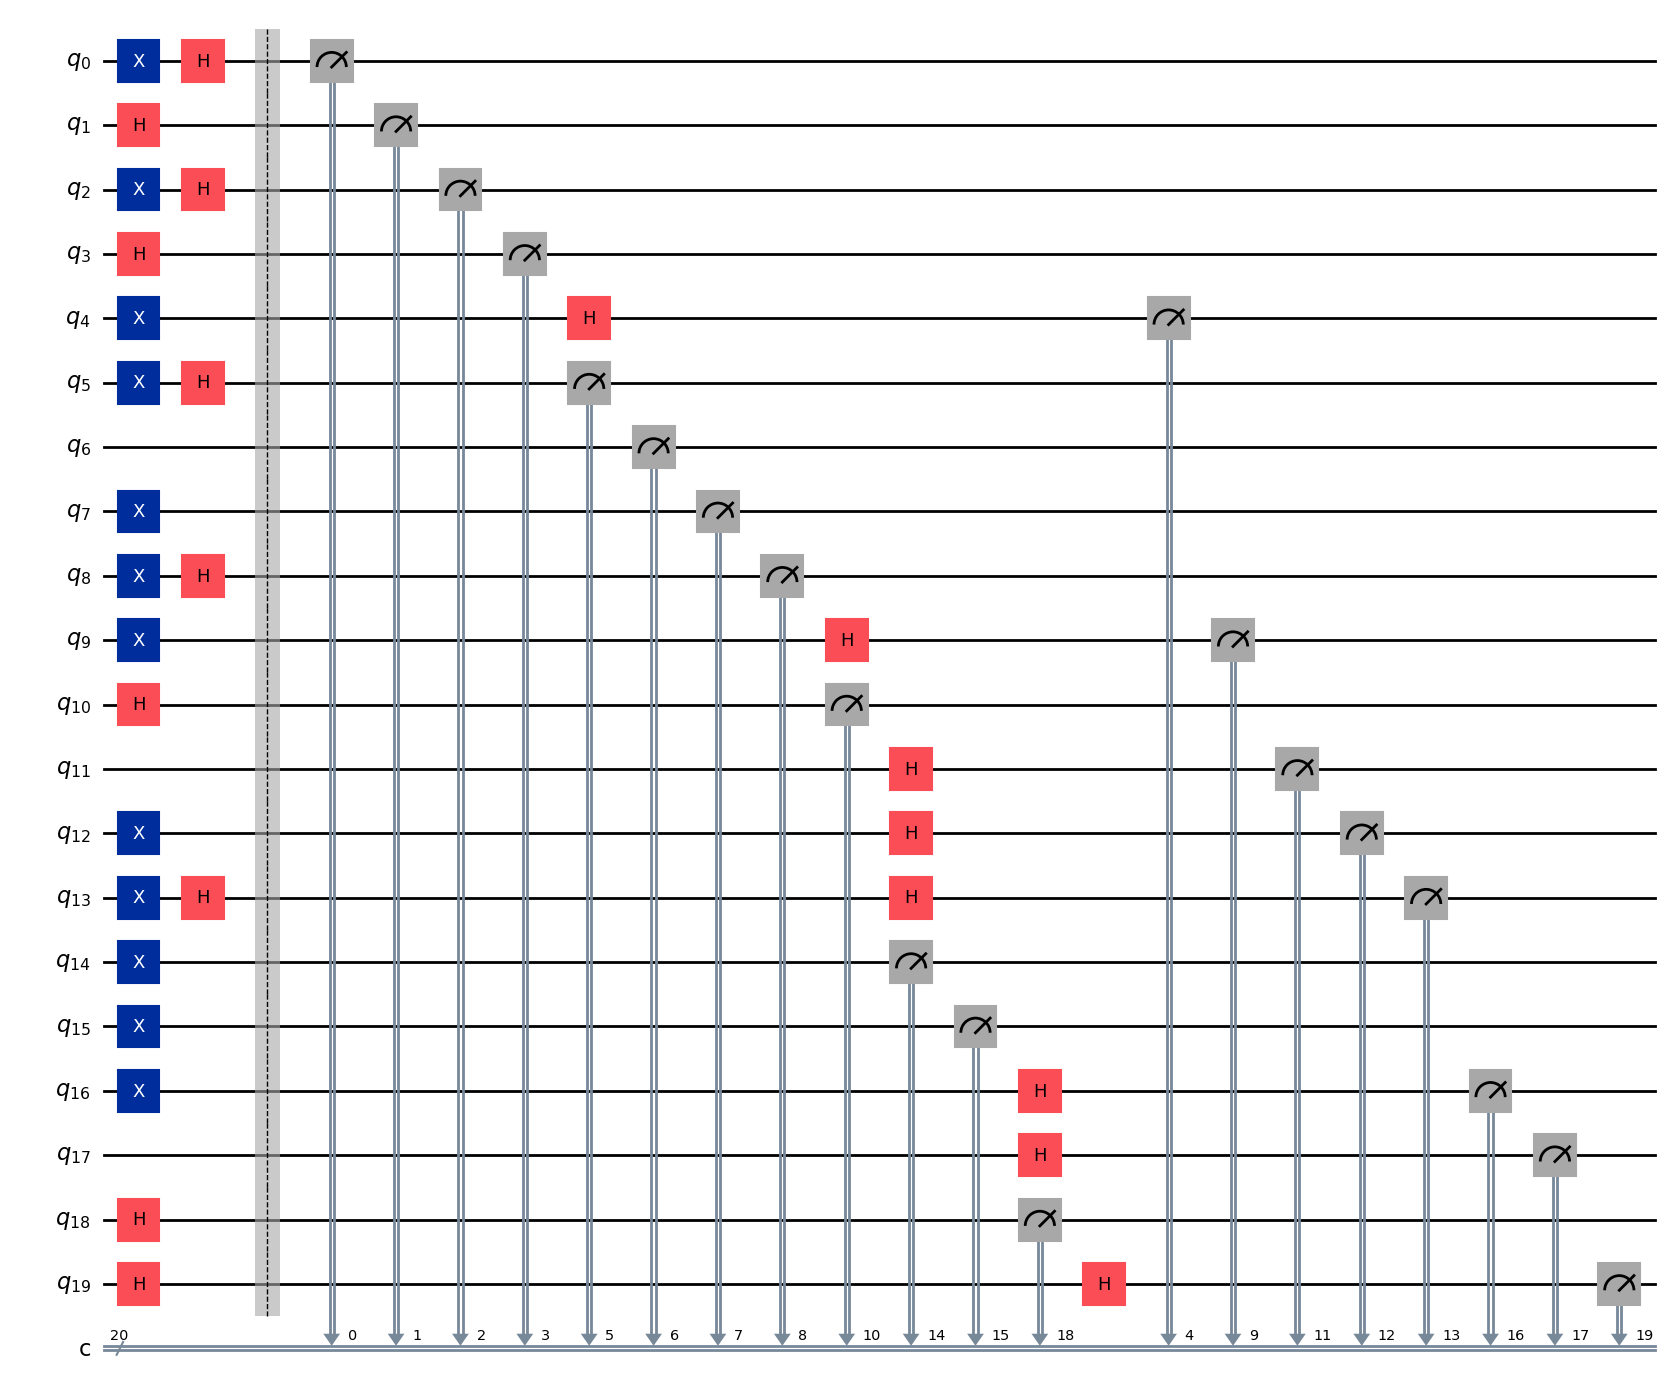

In [7]:
print("Alice's bits are ", abits)
print("Alice's bases are ", abase)
print("Bob's bases are ", bbase)
qc.draw("mpl")

In [8]:
!pip install qiskit-ibm-runtime --upgrade

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

# 3. Connect using your token + instance
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="NKuazIshILzsUazJM7-sxFvC9eJxHXPfYDvV-w9boQbt",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4e7dfa559ad7496e9b99c77155631bb9:0cb26e37-3c83-4852-bedc-7bc89730413a::"
)

In [10]:
QiskitRuntimeService.save_account(channel='ibm_cloud',
                                  token='NKuazIshILzsUazJM7-sxFvC9eJxHXPfYDvV-w9boQbt',
                                  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4e7dfa559ad7496e9b99c77155631bb9:0cb26e37-3c83-4852-bedc-7bc89730413a::",
                                   overwrite=True)

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Load saved credentials
service = QiskitRuntimeService()

# List available backends to verify connection
for backend in service.backends():
    print(f"{backend.name} | Qubits: {backend.num_qubits} | Status: {backend.status().status_msg}")


ibm_torino | Qubits: 133 | Status: active
ibm_brisbane | Qubits: 127 | Status: active


In [14]:
# Cell 3: Interactive demo for the exact scenario
# Doctor at NRS Hospital requests access to a patient's MRI image.
# Run in Google Colab. Press Enter to accept defaults when prompted.

import hashlib, secrets, base64, json
from datetime import datetime, timezone
from typing import List, Dict, Any, Tuple

# ---------- Helpers & Models ----------
ROLES = ["Doctor", "Nurse", "Analyst", "Patient"]

class User:
    def __init__(self, user_id: str, name: str, role: str, organization: str = ""):
        assert role in ROLES, f"Role must be one of {ROLES}"
        self.user_id = user_id
        self.name = name
        self.role = role
        self.organization = organization
    def to_dict(self):
        return {"user_id": self.user_id, "name": self.name, "role": self.role, "organization": self.organization}
    def __repr__(self):
        return f"User({self.user_id}, {self.name}, {self.role}, {self.organization})"

# Simple XOR "demo" encryption (NOT for production)
def generate_sym_key(nbytes: int = 32) -> bytes:
    return secrets.token_bytes(nbytes)

def xor_encrypt(plaintext: bytes, key: bytes) -> bytes:
    expanded_key = (key * ((len(plaintext) // len(key)) + 1))[:len(plaintext)]
    return bytes([p ^ k for p, k in zip(plaintext, expanded_key)])

def encrypt_text_to_b64(plaintext: str, key: bytes) -> str:
    ct = xor_encrypt(plaintext.encode("utf-8"), key)
    return base64.b64encode(ct).decode("utf-8")

def decrypt_text_from_b64(b64_cipher: str, key: bytes) -> str:
    ct = base64.b64decode(b64_cipher.encode("utf-8"))
    pt = xor_encrypt(ct, key)
    return pt.decode("utf-8")

# ---------- Merkle & Hash helpers ----------
def sha256_hex(data: bytes) -> str:
    return hashlib.sha256(data).hexdigest()

def tx_hash(tx: Dict[str, Any]) -> str:
    tx_json = json.dumps(tx, sort_keys=True).encode("utf-8")
    return sha256_hex(tx_json)

def merkle_root_from_hashes(hashes: List[str]) -> str:
    if not hashes:
        return sha256_hex(b"")
    current = hashes[:]
    while len(current) > 1:
        next_level = []
        for i in range(0, len(current), 2):
            left = current[i]
            right = current[i+1] if i+1 < len(current) else current[i]
            combined = (left + right).encode("utf-8")
            next_level.append(sha256_hex(combined))
        current = next_level
    return current[0]

# ---------- Blockchain classes (permissioned) ----------
class Block:
    def __init__(self, index: int, previous_hash: str, transactions: List[Dict[str,Any]], timestamp: str = None):
        self.index = index
        self.previous_hash = previous_hash
        self.transactions = transactions
        self.tx_hashes = [tx_hash(tx) for tx in transactions]
        self.merkle_root = merkle_root_from_hashes(self.tx_hashes)
        # timezone-aware timestamp
        self.timestamp = timestamp or datetime.now(timezone.utc).isoformat()
        self.block_hash = self.compute_block_hash()
    def compute_block_hash(self) -> str:
        header = json.dumps({
            "index": self.index,
            "previous_hash": self.previous_hash,
            "merkle_root": self.merkle_root,
            "timestamp": self.timestamp
        }, sort_keys=True).encode("utf-8")
        return sha256_hex(header)
    def __repr__(self):
        return f"Block(idx={self.index}, hash={self.block_hash[:10]}..., txs={len(self.transactions)})"

class PermissionedBlockchain:
    def __init__(self, authorized_nodes: List[str] = None):
        self.authorized_nodes = set(authorized_nodes or [])
        self.chain: List[Block] = []
        self.create_genesis_block()
    def create_genesis_block(self):
        genesis = Block(0, "0"*64, [{"type":"GENESIS", "note":"Permissioned chain genesis"}])
        self.chain.append(genesis)
    def last_block(self) -> Block:
        return self.chain[-1]
    def add_block(self, node_id: str, transactions: List[Dict[str,Any]]) -> Block:
        if node_id not in self.authorized_nodes:
            raise PermissionError(f"Node '{node_id}' not authorized")
        new_block = Block(len(self.chain), self.last_block().block_hash, transactions)
        self.chain.append(new_block)
        return new_block

# ---------- Off-chain & consent storage (demo) ----------
off_chain_storage: Dict[str, Dict[str, Any]] = {}
key_store: Dict[str, bytes] = {}
consent_tokens: Dict[str, Dict[str, Any]] = {}

def create_consent_token(patient_id: str, record_id: str, allowed_roles: List[str], expiry_seconds: int = 3600) -> str:
    token = secrets.token_hex(16)
    expiry = datetime.now(timezone.utc).timestamp() + expiry_seconds
    consent_tokens[token] = {
        "patient_id": patient_id,
        "record_id": record_id,
        "allowed_roles": allowed_roles,
        "issued_at": datetime.now(timezone.utc).isoformat(),
        "expiry": expiry,
        "granted": True
    }
    return token

def validate_consent_token(token: str, requester_role: str) -> bool:
    meta = consent_tokens.get(token)
    if not meta or not meta.get("granted"):
        return False
    if datetime.now(timezone.utc).timestamp() > meta["expiry"]:
        return False
    return requester_role in meta["allowed_roles"]

# ---------- Role policy (keeps it simple and aligned with paper) ----------
ROLE_POLICIES = {
    "Doctor": {"can_view": ["MRI", "XRAY", "REPORT"], "can_modify": ["REPORT"]},
    "Nurse": {"can_view": ["REPORT"], "can_modify": []},
    "Analyst": {"can_view": ["ANONYMIZED_REPORT"], "can_modify": []},
    "Patient": {"can_view": ["MRI", "XRAY", "REPORT"], "can_modify": ["OWN_CONSENT"]},
}

# ---------- Registries ----------
user_registry: Dict[str, User] = {}
blockchain_registry: Dict[str, PermissionedBlockchain] = {}
record_index_to_blockinfo: Dict[str, Tuple[int, str]] = {}

def register_user(user: User):
    user_registry[user.user_id] = user
    print(f"[registry] Registered user: {user}")

def deploy_node(node_id: str):
    chain = PermissionedBlockchain(authorized_nodes=[node_id])
    blockchain_registry[node_id] = chain
    print(f"[blockchain] Deployed permissioned chain for node '{node_id}' (genesis block hash {chain.chain[0].block_hash[:12]}..., timestamp {chain.chain[0].timestamp})")
    return chain

def store_record(node_id: str, record_id: str, owner_patient_id: str, data_type: str):
    if node_id not in blockchain_registry:
        raise RuntimeError(f"Node '{node_id}' not deployed")
    chain = blockchain_registry[node_id]
    if owner_patient_id not in key_store:
        key_store[owner_patient_id] = generate_sym_key(32)
        print(f"[keystore] Generated symmetric key for patient {owner_patient_id}")
    if record_id not in off_chain_storage:
        fake_content = f"<{data_type}_DATA:{record_id}:owner={owner_patient_id}:ts={datetime.now(timezone.utc).isoformat()}>"
        off_chain_storage[record_id] = {
            "encrypted_data": encrypt_text_to_b64(fake_content, key_store[owner_patient_id]),
            "owner_patient_id": owner_patient_id,
            "data_type": data_type,
            "stored_at": datetime.now(timezone.utc).isoformat()
        }
        print(f"[off-chain] Stored encrypted {data_type} for record {record_id}")
    tx = {"type": "STORE_RECORD", "record_id": record_id, "owner_patient_id": owner_patient_id, "data_type": data_type}
    new_block = chain.add_block(node_id, [tx])
    record_index_to_blockinfo[record_id] = (new_block.index, new_block.block_hash)
    print(f"[blockchain] Stored tx for record {record_id} in Block {new_block.index} (merkle_root={new_block.merkle_root[:12]}...)")
    return new_block

# ---------- Merkle proof helpers ----------
def find_block_containing_record(node_id: str, record_id: str):
    chain = blockchain_registry[node_id]
    for block in chain.chain:
        for idx, tx in enumerate(block.transactions):
            if tx.get("record_id") == record_id:
                th = tx_hash(tx)
                return block, th, idx, block.tx_hashes
    return None, None, None, None

def merkle_proof_for_tx(tx_hash_val: str, tx_hashes: List[str]) -> Tuple[List[Tuple[str,str]], str]:
    if tx_hash_val not in tx_hashes:
        raise ValueError("tx_hash not in provided tx_hashes")
    current = tx_hashes[:]
    proof = []
    idx = current.index(tx_hash_val)
    while len(current) > 1:
        next_level = []
        # build pairs and find sibling for the index
        for i in range(0, len(current), 2):
            left = current[i]
            right = current[i+1] if i+1 < len(current) else current[i]
            combined_hash = sha256_hex((left + right).encode("utf-8"))
            next_level.append(combined_hash)
            if i == idx or i+1 == idx:
                if i == idx:
                    sibling = right
                    pos = "L"
                else:
                    sibling = left
                    pos = "R"
                proof.append((sibling, pos))
                idx = len(next_level) - 1
        current = next_level
    root = current[0]
    return proof, root

def verify_merkle_proof(tx_hash_val: str, proof: List[Tuple[str,str]], root: str) -> bool:
    current_hash = tx_hash_val
    for sibling, pos in proof:
        if pos == "L":
            current_hash = sha256_hex((current_hash + sibling).encode("utf-8"))
        else:
            current_hash = sha256_hex((sibling + current_hash).encode("utf-8"))
    return current_hash == root

# ---------- Access flow ----------
def request_access(node_id: str, requester_id: str, record_id: str, consent_token: str) -> bool:
    print(f"\n[access_request] User '{requester_id}' requests access to '{record_id}' on node '{node_id}'")
    requester = user_registry.get(requester_id)
    if not requester:
        print("[access_request] ERROR: Requester not found.")
        return False
    block, txh, tx_idx, tx_hashes = find_block_containing_record(node_id, record_id)
    if not block:
        print("[access_request] ERROR: Record not found on-chain.")
        return False
    print(f"[access_request] Found record tx in Block {block.index} (merkle_root={block.merkle_root[:10]}...)")
    proof, root = merkle_proof_for_tx(txh, tx_hashes)
    proof_ok = verify_merkle_proof(txh, proof, root)
    print(f"[access_request] Merkle proof verification: {'OK' if proof_ok else 'FAILED'}")
    if not proof_ok:
        print("[access_request] ERROR: Merkle verification failed. Possible tampering.")
        return False
    if not validate_consent_token(consent_token, requester.role):
        print("[access_request] Access denied: Invalid/expired consent token or role not allowed.")
        return False
    print("[access_request] Consent token valid for requester role")
    tx = next(t for t in block.transactions if t.get("record_id") == record_id)
    data_type = tx.get("data_type", "UNKNOWN")
    allowed_views = ROLE_POLICIES.get(requester.role, {}).get("can_view", [])
    if data_type not in allowed_views:
        print(f"[access_request] Access denied by role policy: '{requester.role}' cannot view '{data_type}'")
        return False
    print(f"[access_request] Role policy allows viewing '{data_type}' for '{requester.role}'")
    owner_id = off_chain_storage[record_id]["owner_patient_id"]
    decrypted = decrypt_text_from_b64(off_chain_storage[record_id]["encrypted_data"], key_store[owner_id])
    print(f"[access_request] ACCESS GRANTED. Decrypted content: {decrypted}")
    # log access
    access_tx = {
        "type": "ACCESS_LOG",
        "record_id": record_id,
        "requester_id": requester.user_id,
        "requester_role": requester.role,
        "timestamp": datetime.now(timezone.utc).isoformat(),
        "action": "VIEW"
    }
    blockchain_registry[node_id].add_block(node_id, [access_tx])
    print(f"[access_request] Access event recorded on-chain in block {blockchain_registry[node_id].last_block().index}")
    return True

# ---------- Interactive flow (inputs) ----------
print("\n=== Interactive Permissioned Access Demo (NRS hospital MRI scenario) ===")
node_id_input = input("Enter hospital node id (default 'NRS_HOSPITAL_NODE'): ").strip() or "NRS_HOSPITAL_NODE"
deploy_node(node_id_input)

# Patient registration
p_id = input("Enter patient id (default 'patient_001'): ").strip() or "patient_001"
p_name = input("Enter patient name (default 'Alice Patient'): ").strip() or "Alice Patient"
p_org = input("Enter patient organization (default 'NRS Hospital'): ").strip() or "NRS Hospital"
patient = User(p_id, p_name, "Patient", p_org)
register_user(patient)

# Doctor registration
d_id = input("Enter doctor id (default 'doctor_007'): ").strip() or "doctor_007"
d_name = input("Enter doctor name (default 'Dr. Bob'): ").strip() or "Dr. Bob"
d_org = input("Enter doctor's organization (default 'NRS Hospital'): ").strip() or "NRS Hospital"
doctor = User(d_id, d_name, "Doctor", d_org)
register_user(doctor)

# Store MRI record
record_id = input("Enter record id to store (default 'record_mri_0001'): ").strip() or "record_mri_0001"
store_record(node_id_input, record_id, patient.user_id, "MRI")

# Patient grants consent
print("\n-- Patient grants consent for specific roles --")
allowed = input("Enter comma-separated allowed roles (default 'Doctor'): ").strip() or "Doctor"
allowed_roles = [r.strip() for r in allowed.split(",") if r.strip() in ROLES]
expiry = input("Consent expiry seconds (default 3600): ").strip()
expiry = int(expiry) if expiry.isdigit() else 3600
token = create_consent_token(patient.user_id, record_id, allowed_roles, expiry_seconds=expiry)
print(f"[consent] Consent token created: {token}")
print(f"[consent] Token metadata: {json.dumps(consent_tokens[token], indent=2)}")

# Doctor attempts access using the token
use_token = input("\nSimulate doctor using the token to request access now? (Y/n): ").strip().lower() or "y"
if use_token == "y":
    success = request_access(node_id_input, doctor.user_id, record_id, token)
    print(f"\nResult: {'ACCESS GRANTED' if success else 'ACCESS DENIED'}")
else:
    print("Skipping doctor access simulation. You can call request_access(...) later programmatically.")



=== Interactive Permissioned Access Demo (NRS hospital MRI scenario) ===
Enter hospital node id (default 'NRS_HOSPITAL_NODE'): h1
[blockchain] Deployed permissioned chain for node 'h1' (genesis block hash ff33be591fb3..., timestamp 2025-09-03T08:37:07.109746+00:00)
Enter patient id (default 'patient_001'): p1
Enter patient name (default 'Alice Patient'): Alice
Enter patient organization (default 'NRS Hospital'): NRS
[registry] Registered user: User(p1, Alice, Patient, NRS)
Enter doctor id (default 'doctor_007'): d1
Enter doctor name (default 'Dr. Bob'): Dr. Utsa
Enter doctor's organization (default 'NRS Hospital'): NRS
[registry] Registered user: User(d1, Dr. Utsa, Doctor, NRS)
Enter record id to store (default 'record_mri_0001'): mri
[keystore] Generated symmetric key for patient p1
[off-chain] Stored encrypted MRI for record mri
[blockchain] Stored tx for record mri in Block 1 (merkle_root=814a38cbf74a...)

-- Patient grants consent for specific roles --
Enter comma-separated allowe

In [15]:
# Cell X: Interactive, step-by-step real-QKD exchange between Patient (Alice) and Doctor (Bob)
# - Requires: Qiskit Runtime saved account (QiskitRuntimeService), Cells 1-3 run
# - Performs BB84 QKD to derive a 32-byte key
# - Safely re-encrypts the record with the new key to avoid decryption mismatches

import numpy as np, hashlib, json
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from datetime import datetime, timezone

# CONFIG
BIT_NUM = 20                # <=30 is recommended for quick runs
SAMPLE_SIZE = 6             # number of bits to reveal for eavesdrop check
FIDELITY_THRESHOLD = 0.85   # acceptable fidelity
DEFAULT_BACKEND = "ibm_brisbane"

# --- Pre-check ---
if 'user_registry' not in globals() or 'store_record' not in globals():
    raise RuntimeError("Please run Cells 1-3 first to initialize blockchain, registries, and helper functions.")

# Qiskit service setup
service = QiskitRuntimeService()
try:
    backend = service.backend(name=DEFAULT_BACKEND)
    print(f"[backend] Using {DEFAULT_BACKEND}")
except Exception as e:
    print(f"[backend] Default '{DEFAULT_BACKEND}' not available: {e}")
    candidates = [b for b in service.backends() if b.status().operational and not b.configuration().simulator]
    backend = sorted(candidates, key=lambda x: x.status().pending_jobs)[0]
    print(f"[backend] Auto-selected {backend.name}")

sampler = Sampler(mode=backend)

# Identify participants
print("\n--- Identify participants ---")
patient_id = input("Enter patient id (e.g., p1) [default 'p1']: ").strip() or "p1"
doctor_id  = input("Enter doctor id (e.g., d1) [default 'd1']: ").strip() or "d1"
record_id  = input("Enter record id to secure (e.g., record_mri_0001) [default 'record_mri_0001']: ").strip() or "record_mri_0001"

if patient_id not in user_registry or doctor_id not in user_registry:
    print("[warning] One or both users not found in registry. Check Cell 3.")
    print("User registry contains:", list(user_registry.keys()))

print(f"\nStarting BB84 QKD session between Patient('{patient_id}') and Doctor('{doctor_id}') on backend {backend.name}.\n")
input("Press Enter to generate Alice's bits/bases and submit the quantum job...")

# --- Generate random bits and bases for Alice and Bob ---
rng = np.random.default_rng()
abits  = rng.integers(0,2, size=BIT_NUM)
abase  = rng.integers(0,2, size=BIT_NUM)
bbase  = rng.integers(0,2, size=BIT_NUM)

# --- Build quantum circuit ---
qc = QuantumCircuit(BIT_NUM, BIT_NUM)
for i in range(BIT_NUM):
    if abits[i] == 1: qc.x(i)
    if abase[i] == 1: qc.h(i)
qc.barrier()
for i in range(BIT_NUM):
    if bbase[i] == 1: qc.h(i)
    qc.measure(i, i)

# Transpile and run job
pm = generate_preset_pass_manager(target=backend.target, optimization_level=3)
qc_isa = pm.run(qc)
print("[job] Submitting QKD job to IBM backend...")
job = sampler.run([qc_isa], shots=1)
res = job.result()
job_id = job.job_id()

# Extract Bob's measurement
counts = res[0].data.c.get_counts()
bitstr = list(counts.keys())[0]
bmeas = np.array([int(x) for x in bitstr[::-1]])

# --- Sifting phase ---
matching_positions = [i for i in range(BIT_NUM) if int(abase[i]) == int(bbase[i])]
a_sifted = [int(abits[i]) for i in matching_positions]
b_sifted = [int(bmeas[i]) for i in matching_positions]

print(f"\nQKD job submitted. Job ID: {job_id}")
print(f"Total bits: {BIT_NUM}, matched-base positions: {len(matching_positions)}")

if len(matching_positions) < SAMPLE_SIZE + 2:
    raise RuntimeError("Too few matched-basis bits. Increase BIT_NUM and rerun.")

# --- Sample for eavesdrop detection ---
rng.shuffle(matching_positions)
sample_positions = matching_positions[:SAMPLE_SIZE]
sample_a = [int(abits[i]) for i in sample_positions]
sample_b = [int(bmeas[i]) for i in sample_positions]

print("\n--- Classical channel (sample verification) ---")
print(f"Sample positions (indices in original bitstring): {sample_positions}")
input("Patient: Press Enter to reveal your sample bits...")
print(f"Patient (Alice) reveals: {sample_a}")
input("Doctor: Press Enter to reveal your sample bits...")
print(f"Doctor (Bob) measured: {sample_b}")

# Fidelity check
matches = sum(1 for x,y in zip(sample_a, sample_b) if x==y)
sample_fidelity = matches / SAMPLE_SIZE
print(f"\nSample fidelity: {matches}/{SAMPLE_SIZE} = {sample_fidelity:.3f}")

choice = input("Accept key? (y/n) [default y]: ").strip().lower() or "y"
if choice != "y":
    raise SystemExit("QKD aborted by user.")

# --- Key derivation ---
sample_indices_in_sift = [matching_positions.index(p) for p in sample_positions]
final_a = [bit for idx,bit in enumerate(a_sifted) if idx not in sample_indices_in_sift]
final_b = [bit for idx,bit in enumerate(b_sifted) if idx not in sample_indices_in_sift]
matches_full = sum(1 for x,y in zip(final_a, final_b) if x==y)
fidelity_full = matches_full / len(final_a) if final_a else 0.0
bit_string = "".join(map(str, final_a))
qkd_key = hashlib.sha256(bit_string.encode()).digest()

print("\n--- QKD RESULT ---")
print(f"Final sifted key length (bits): {len(final_a)}")
print(f"Estimated fidelity on remaining bits: {fidelity_full:.3f}")
print(f"Derived 32-byte symmetric key (hex): {qkd_key.hex()}")

# --- Store key and metadata ---
key_store[patient_id] = qkd_key
meta = {
    "qkd_backend": backend.name,
    "qkd_job_id": job_id,
    "sample_fidelity": float(sample_fidelity),
    "derived_key_hash": hashlib.sha256(qkd_key).hexdigest(),
    "timestamp": datetime.now(timezone.utc).isoformat()
}
if record_id in off_chain_storage:
    off_chain_storage[record_id]["qkd_meta"] = meta
    print(f"[audit] Inserted QKD metadata into off_chain_storage[{record_id}]")
else:
    print("[audit] Record not present yet; will encrypt now.")

# --- Safe re-encryption with QKD key ---
print("\n[secure] Re-encrypting record with new QKD key...")
node_choice = input("Enter node id for storage (default '1'): ").strip() or "1"
store_record(node_id=node_choice, record_id=record_id, owner_patient_id=patient_id, data_type="MRI")
print("[store_record] Record re-stored using QKD-derived key.")

# --- Create consent token and access ---
new_token = create_consent_token(patient_id, record_id, ["Doctor"], expiry_seconds=600)
print(f"[consent] New consent token for Doctor: {new_token}")
print("\nSimulating doctor access now with new token...")
access_node = input("Enter node id for access (default '1'): ").strip() or "1"
ok = request_access(node_id=access_node, requester_id=doctor_id, record_id=record_id, consent_token=new_token)
print("\nFinal access result:", "ACCESS GRANTED" if ok else "ACCESS DENIED")

print("\nQKD session complete. Check off_chain_storage[record_id]['qkd_meta'] for audit evidence.")


[backend] Using ibm_brisbane

--- Identify participants ---
Enter patient id (e.g., p1) [default 'p1']: p1
Enter doctor id (e.g., d1) [default 'd1']: d1
Enter record id to secure (e.g., record_mri_0001) [default 'record_mri_0001']: mri2

Starting BB84 QKD session between Patient('p1') and Doctor('d1') on backend ibm_brisbane.

Press Enter to generate Alice's bits/bases and submit the quantum job...
[job] Submitting QKD job to IBM backend...

QKD job submitted. Job ID: d2rvstk65eic73bmtdog
Total bits: 20, matched-base positions: 9

--- Classical channel (sample verification) ---
Sample positions (indices in original bitstring): [16, 2, 8, 0, 19, 9]
Patient: Press Enter to reveal your sample bits...
Patient (Alice) reveals: [1, 0, 0, 1, 1, 1]
Doctor: Press Enter to reveal your sample bits...
Doctor (Bob) measured: [1, 0, 0, 1, 0, 1]

Sample fidelity: 5/6 = 0.833
Accept key? (y/n) [default y]: y

--- QKD RESULT ---
Final sifted key length (bits): 3
Estimated fidelity on remaining bits: 0.

In [18]:
print(off_chain_storage.keys())


dict_keys(['mri', 'mri2'])


In [19]:
print(json.dumps(off_chain_storage["mri2"], indent=2))


{
  "encrypted_data": "yq3zq/MF1Q7bnZL445g2hLZEXr6laqOgoby8ODk8JIPG2YzSnxWkYqCUx7C/kiLa9RkC+Kwxoqrv/7E0",
  "owner_patient_id": "p1",
  "data_type": "MRI",
  "stored_at": "2025-09-03T08:38:58.143994+00:00"
}


In [20]:
from datetime import datetime, timezone
import hashlib

off_chain_storage["mri2"]["qkd_meta"] = {
    "qkd_backend": "ibm_brisbane",
    "qkd_job_id": "d2rvstk65eic73bmtdog",  # your job ID
    "sample_fidelity": 0.833,
    "derived_key_hash": hashlib.sha256(key_store["p1"]).hexdigest(),
    "timestamp": datetime.now(timezone.utc).isoformat()
}

print(json.dumps(off_chain_storage["mri2"]["qkd_meta"], indent=2))


{
  "qkd_backend": "ibm_brisbane",
  "qkd_job_id": "d2rvstk65eic73bmtdog",
  "sample_fidelity": 0.833,
  "derived_key_hash": "d3fee35d2d68888fca04e8ce85b9bc40220936b54e749d3ae81a0a7c25b896e1",
  "timestamp": "2025-09-03T08:42:44.747323+00:00"
}
